<h1 style="color:black;font-weight:bold;font-family:Georgia">Comparison, Masks, and Boolean Logic</h1>

<p>Masks can be used to examine or manipulate values</p>

In [3]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lets have an array with some random integers from 1, 100.

our_array = np.random.randint(1, 100, (3,3))

<h3 style="color:black;font-weight:normal;font-family:Georgia">Aggregates computed directly on Boolean arrays</h3>

In [ ]:
# Find all items less than N
our_array < 50

In [ ]:
# Using compound expressions.

2 * our_array >= (our_array + 50)

In [ ]:
# Note: RandomState is used to create a custom range so, we don't affect the global numpy state.
# Additional Note: You can check the global state with: `np.random.get_state() and our own created rng.get_state()`

rng = np.random.RandomState(0)
array_rand_int = rng.randint(10, size=(3, 4))
array_rand_int

In [ ]:
# The result of such operations is a boolean array.
bool_array = array_rand_int < 6
print(bool_array)

<h2 style="color:black;font-weight:bold;font-family:Georgia">There are certain things we can do with a boolean array</h2>

In [ ]:
# Find number of True's in our result array above.

np.count_nonzero(bool_array)

In [ ]:
# We can use sum also on a boolean array. 
# Imagine False as Zero. And True as 1.
# So a sum function should return us the number of True (1+1+... for every True)

# So this is the ame as above ufunc "count_nonzero"

np.sum(bool_array)

In [ ]:
# Find count of number of Trues in each row (axis=1 is for 'row', axis=0 is for 'column').
np.count_nonzero(bool_array, axis=1)

In [ ]:
# Are there any values greater than , lets say 6

np.any(array_rand_int >= 6) 

In [ ]:
# Are all value greater than or equal to 0

np.all(array_rand_int >= 0)

In [ ]:
# Lets do the same, for each row. Find row if all items of row are greater than 0. 

np.all(array_rand_int > 0, axis=1)

<h2 style="color:black;font-weight:bold;font-family:Georgia">Lets try some more tricks with sum ufunc</h2>

In [ ]:
np.sum(array_rand_int == 5)

In [ ]:
# Get me the count of numbers in between the specified range.
# The result is: Total No of numbers that are in that range.
np.sum((array_rand_int > 5) & (array_rand_int < 10))

# NOTE: DO NOT use (and, or) here. They used on a single value to determine the truth.
# Whereas, & | are used on binary operations. ABove MASKS are binary results and hence, can be combined with &.

<h2 style="color:black;font-weight:normal;font-family:Georgia">Boolean arrays as masks</h2>

In [ ]:
# We have already seen boolean operations with arrays. Example : some_array_with_numbers < 6

# Now we want to see the values that resulted in a True.
# What we do to get that, is called, MASKING (and (array_rand_int < 5) is a MASK )

print(array_rand_int[array_rand_int < 5])
 
# You should see exactly the same number of values as nonzero count (8 in this example)

<h2 style="color:black;font-weight:bold;font-family:Georgia">Indexing 2.0</h2>

<p>There are a few other ways to index an array</p>

In [ ]:
rng = np.random.RandomState(42)
array_nums_1d = rng.randint(1, 100, 10)

# Get the 0, 2 and 4th item in the array.
array_nums_1d[[0, 2, 4]] 

In [ ]:
# Lets try the same on a 2d array. We will create a 5 x 5 matrix.

rng = np.random.RandomState(0)
array_rand_int = rng.randint(0, 25, size=(5, 5))

print(array_rand_int)

# Selected row, and columns from it.
array_rand_int[0, [0, 2, 4]] # Get me 1st row, 0th and 2nd index items.


In [ ]:
array_rand_int[[0, 2], [0, 2]] # Get me array(0, 0) and array(2, 2) item.

<h3 style="color:black;font-weight:bold;font-family:Georgia">We can slice an array too using the same idea.</h3>
<hr>
<div>
    <p>I want to select the area highlighted in the image</p>
<img style="width:200px;" src="Slicing_FancyIndexing.png"/>
    </div>

In [ ]:
# Get all rows from 2nd index but only selected columns. This is a Slicing example.

array_rand_int[2:, [2, 3, 4]]

In [ ]:
# Column selection using boolean mask: 1's are True, hence considered. 0's are False, so ignore.

mask = np.array([1, 0, 1, 0, 1], dtype=bool) 
row = np.array([0, 2, 4]) # Take 1st, 3rd and 5th row.
array_rand_int[row[:, np.newaxis], mask]

<h2 style="color:black;font-weight:bold;font-family:Georgia">More fancy examples with indexing</h2>

In [ ]:
# Lets select randomly some members for matrix
# Tip: np.random.choice(high, no_of_choices_to_pick, replace=False)

indices = np.random.choice(5, 3, replace=False)
print(indices)
print(array_rand_int)
indices

# Indices will be used to select which rows to consider.
array_rand_int[indices]

<h2 style="color:black;font-weight:bold;font-family:Georgia">Modifying values</h2>

In [ ]:
# We modified 4 numbers in our array here.
zero_array = np.zeros(10, dtype=int)
zero_array[[0, 2, 4, 6]] += 1 
print(zero_array)

# What if an index is repeated
zero_array[[0, 0, 0]] = [10, 20, 30] 
print(zero_array)

# As you can see, the final value of index0 is 30.

zero_array[[0, 0, 0]] += 1
print(zero_array)

# The result proves that, each time time operation is done considering the original value (30)

In [17]:
# If we do want to have the behaviour such as changes happen as number of times index repeats, 
# there are other ways.
zero_again_array = np.zeros(10, dtype=int)
print(zero_again_array)
np.add.at(zero_again_array, [0, 0, 0], 1)
print(zero_again_array)

# This time you will see, 0th index got updated thrice.

[0 0 0 0 0 0 0 0 0 0]
[3 0 0 0 0 0 0 0 0 0]


<h2 style="color:black;font-weight:bold;font-family:Georgia">Binning Data</h2>


Our Bins: [-3 -2 -1  0  1  2  3]


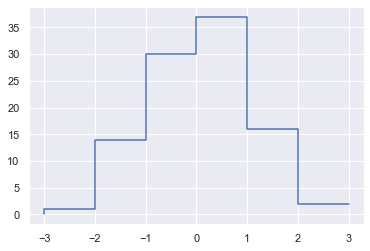

In [20]:
np.random.seed(0)
our_rand_array = np.random.randn(100)

# Lets create 5 bins for the above 100 numbers.
bins = np.linspace(-3, 3, 7, dtype=int)
print("Our Bins:", bins)

# Create a zero array with same shape and size as bins
# This will be used to count the bin values...so initializing with 0's for each bin.
counts = np.zeros_like(bins)
counts

# Find the appropiate bin for each number in our array of random numbers
# The result will be bin numbers for corresponding value.
i = np.searchsorted(bins, our_rand_array)

np.add.at(counts, i, 1)
sns.set()  # for plot styling
plt.step(bins, counts);

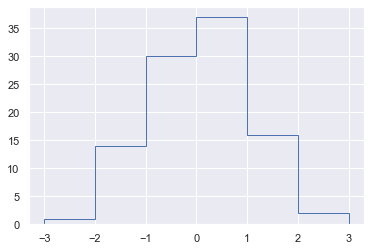

In [21]:
# Same graph, but smaller steps using plt.hist
# But Note: This is slower than the above graph.
plt.hist(our_rand_array, bins, histtype='step');